# 12_Generative_Advertisial Networks

## Creating a GAN - Part One- The Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

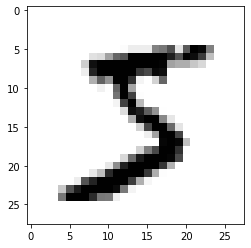

In [3]:
plt.imshow(X_train[0], cmap='binary')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
zeros_train=X_train[y_train==0]
zeros_test=X_test[y_test==0]

## Creating a GAN - Part Two - The Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

In [61]:
discriminator=Sequential()

discriminator.add(Flatten(input_shape=[28,28]))

discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

#final output layer
discriminator.add(Dense(1, activation='sigmoid')) #one neuron even all numbers - just true/false

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [62]:
# 784 --> 150 -->  *100*   -- 150 --> 784
# *30* - coding_size

#decoder/generator part: *100*   -- 150 --> 784

coding_size=100 
generator=Sequential()
generator.add(Dense(100, activation='relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape(target_shape=[28,28]))

In [63]:
GAN=Sequential([generator, discriminator])

In [64]:
discriminator.trainable = False # because it shouldn'b be train during the second phase

In [65]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [66]:
# We dont compile generator because it only train thru full GAN model !!!!!!!!!!!!!!

##  Creating a GAN - Part Three - Model Training

In [67]:
batch_size=32
my_data=zeros_train
dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [68]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [69]:
#drop last items - if we split all dataset into batches - sth is "missing" -drop reminder will drop it

dataset=dataset.batch(batch_size=batch_size, drop_remainder=True).prefetch(1)

In [70]:
epochs=5

In [71]:
GAN

In [72]:
GAN.layers

In [73]:
GAN.layers[0].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [74]:
GAN.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [75]:
generator, discriminator=GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    
    for X_batch in dataset:
        i=i+1
        if i%100==0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
            
        
        #discriminator phase
        noise=tf.random.normal(shape=[batch_size, coding_size])
        gen_images=generator(noise)
        X_fake_vs_real=tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        
        y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discriminator.trainable=True
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        #train generator
        noise=tf.random.normal(shape=[batch_size, coding_size])
        y2=tf.constant([[1.0]]*batch_size)
        discriminator.trainable=False 
        
        GAN.train_on_batch(noise, y2)
        
        
print('Training complete')

Currently on Epoch 1
	Currenty on batch number:  100  of  185
Currently on Epoch 2
	Currenty on batch number:  100  of  185
Currently on Epoch 3
	Currenty on batch number:  100  of  185
Currently on Epoch 4
	Currenty on batch number:  100  of  185
Currently on Epoch 5
	Currenty on batch number:  100  of  185
Training complete


In [76]:
noise=tf.random.normal(shape=[10, coding_size])
noise.shape

TensorShape([10, 100])

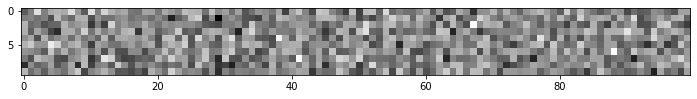

In [77]:
plt.figure(figsize=(12,4))
plt.imshow(noise, cmap='binary')

In [78]:
images=generator(noise)
images.shape

TensorShape([10, 28, 28])

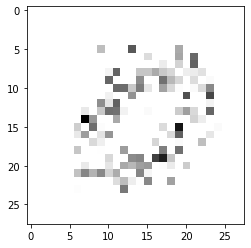

In [79]:
plt.imshow(images[0], cmap='binary')

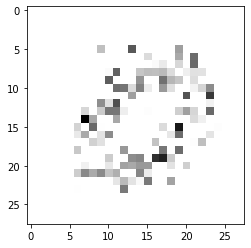

In [81]:
plt.imshow(images[3], cmap='binary')

In [82]:
# !!! WARNING _ MODE COLLAPSE - it return almost THE SAME values!

## DCGAN - Deep Convolutional Generative Adversarial Networks
